# Multimodal Coding with Qwen3-VL (Together AI)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/togethercomputer/together-cookbook/blob/main/Multimodal/Vision/Image_to_Code.ipynb)


## Introduction

In this notebook, we'll explore Qwen3-VL's image-to-code generation capabilities using Together AI's API. We'll cover:

1. **Screenshot to HTML**: Convert UI screenshots into functional HTML code
2. **Chart to Code**: Generate matplotlib code to recreate charts

These capabilities are useful for rapid prototyping and data visualization.


### Install required libraries


In [ ]:
!pip install openai pillow matplotlib


In [5]:
import os
import re
import base64
import openai
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Together AI Configuration
client = openai.OpenAI(
    api_key=os.environ.get("TOGETHER_API_KEY"),
    base_url="https://api.together.xyz/v1",
)

MODEL_ID = "Qwen/Qwen3-VL-32B-Instruct"

print(f"Using model: {MODEL_ID}")
print(f"API Key configured: {bool(os.environ.get('TOGETHER_API_KEY'))}")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [2]:
# Utility functions

def encode_image(image_path):
    with open(image_path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")

def get_mime_type(image_path):
    ext = image_path.split(".")[-1].lower()
    return "jpeg" if ext in ["jpg", "jpeg"] else ext

def extract_code_block(text, language="python"):
    """Extract the last code block from the text."""
    pattern = rf"```(?:{language}|html)(.*?)```"
    code_blocks = re.findall(pattern, text, re.DOTALL)
    if code_blocks:
        return code_blocks[-1].strip()
    return None

def show_image(image_path, max_width=800):
    """Display image in notebook."""
    img = Image.open(image_path)
    if img.width > max_width:
        ratio = max_width / img.width
        new_height = int(img.height * ratio)
        img = img.resize((max_width, new_height))
    display(img)


## 1. Image-to-HTML Conversion

Convert a screenshot or sketch into functional HTML code.


In [3]:
def screenshot_to_html(image_path):
    """Convert screenshot to HTML using Qwen3-VL."""
    base64_image = encode_image(image_path)
    mime_type = get_mime_type(image_path)
    
    response = client.chat.completions.create(
        model=MODEL_ID,
        messages=[{
            "role": "user",
            "content": [
                {"type": "image_url", "image_url": {"url": f"data:image/{mime_type};base64,{base64_image}"}},
                {"type": "text", "text": "Analyze this screenshot and convert it to clean, functional and modern HTML code."},
            ],
        }],
        max_tokens=16384,
        temperature=0.8,
    )
    
    response_text = response.choices[0].message.content
    code = extract_code_block(response_text, "html")
    return code if code else response_text


Input image:


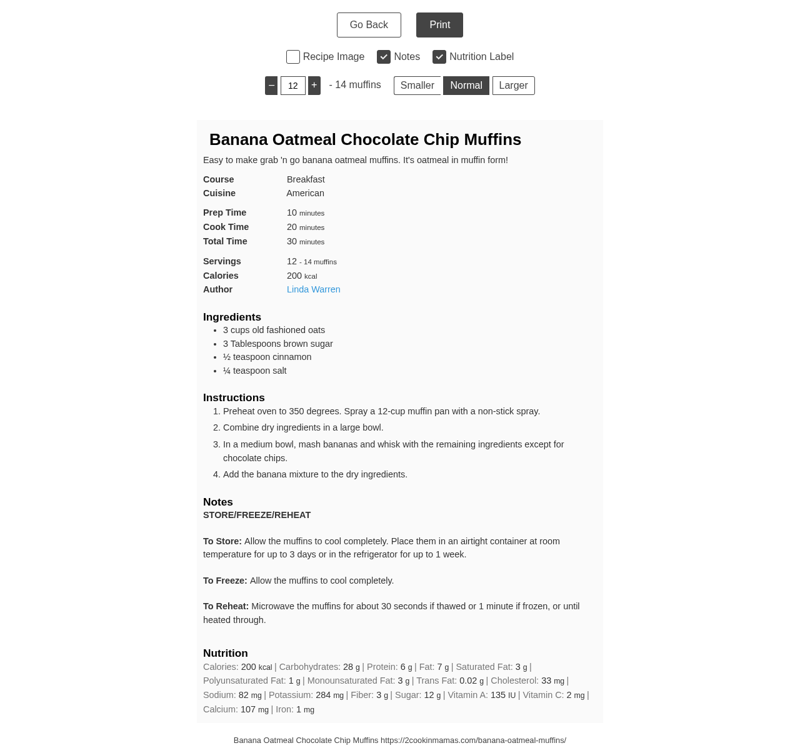

NameError: name 'client' is not defined

In [4]:
# Example: Convert a screenshot to HTML
input_image_path = "../assets/multimodal_coding/screenshot_demo.png"

print("Input image:")
show_image(input_image_path)

html_code = screenshot_to_html(input_image_path)
print("\n" + "="*50)
print("Generated HTML (first 2000 chars):")
print("="*50)
print(html_code[:2000] if html_code else "No code generated")


In [ ]:
# Save and optionally view the HTML
if html_code:
    output_html_path = "generated_output.html"
    with open(output_html_path, "w") as f:
        f.write(html_code)
    print(f"HTML saved to {output_html_path}")


## 2. Chart-to-Code

Analyze a chart image and generate matplotlib code to recreate it.


In [ ]:
def chart_to_matplotlib(image_path):
    """Convert chart image to matplotlib code using Qwen3-VL."""
    base64_image = encode_image(image_path)
    mime_type = get_mime_type(image_path)
    
    response = client.chat.completions.create(
        model=MODEL_ID,
        messages=[{
            "role": "user",
            "content": [
                {"type": "text", "text": "Convert this chart image to Python matplotlib code that can reproduce the chart."},
                {"type": "image_url", "image_url": {"url": f"data:image/{mime_type};base64,{base64_image}"}},
            ],
        }],
        max_tokens=16384,
        temperature=0.8,
    )
    
    response_text = response.choices[0].message.content
    code = extract_code_block(response_text, "python")
    return code if code else response_text


In [ ]:
# Example: Convert a chart to matplotlib code
chart_path = "../assets/multimodal_coding/chart2code_input.png"

print("Input chart:")
show_image(chart_path)

matplotlib_code = chart_to_matplotlib(chart_path)
print("\n" + "="*50)
print("Generated Matplotlib Code:")
print("="*50)
print(matplotlib_code if matplotlib_code else "No code generated")


## 3. Execute Generated Code (Optional)

⚠️ **Warning**: Only execute code you have reviewed and trust.


In [ ]:
# Uncomment to execute the generated matplotlib code
# ONLY DO THIS IF YOU HAVE REVIEWED THE CODE

# ALLOW_EXECUTION = True
# if ALLOW_EXECUTION and matplotlib_code:
#     try:
#         exec(matplotlib_code)
#         plt.show()
#     except Exception as e:
#         print(f"Error executing code: {e}")
